In [1]:
import sys
from netCDF4 import chartostring
from mpasanalysis import *
%matplotlib inline

In [2]:
mesh_file = '/Users/qingli/data/mpas/test/super-parameterization/sp_sc/cleangpu-20191014/output_les2.0001-01-01_00.00.00.nc'
data_file = mesh_file
mesh_file_ref = '/Users/qingli/data/mpas/test/super-parameterization/sp_sc/cleangpu-20191014/output_kpp.0001-01-01_00.00.00.nc'
data_file_ref = mesh_file_ref

In [3]:
mpas_data = MPASOData(filepath=data_file, filepath_mesh=mesh_file)
mpas_data_ref = MPASOData(filepath=data_file_ref, filepath_mesh=mesh_file_ref)

### plot temperature

In [4]:
temp = mpas_data.get_domain(varname='temperature', position='cell', name='temperature', units='degC', tidx=-1)
temp_ref = mpas_data_ref.get_domain(varname='temperature', position='cell',
                                    name='temperature', units='degC', tidx=-1)

Reading mesh data from /Users/qingli/data/mpas/test/super-parameterization/sp_sc/cleangpu-20191014/output_les2.0001-01-01_00.00.00.nc
Reading mesh data from /Users/qingli/data/mpas/test/super-parameterization/sp_sc/cleangpu-20191014/output_kpp.0001-01-01_00.00.00.nc


In [5]:
xfrac = 0.5
yfrac = 0.5

(-50000, 500000)

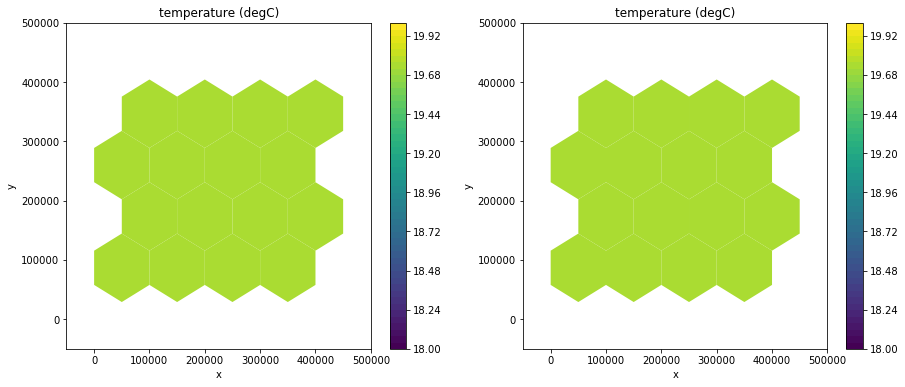

In [6]:
fig, axarr = plt.subplots(1,2)
fig.set_size_inches(15, 6)
levels=np.linspace(18,20,51)
temp.plot_xy(axis=axarr[0],levels=levels)
axarr[0].set_xlim([-50000, 500000])
axarr[0].set_ylim([-50000, 500000])
temp_ref.plot_xy(axis=axarr[1],levels=levels)
axarr[1].set_xlim([-50000, 500000])
axarr[1].set_ylim([-50000, 500000])


Nearest neighbor interpolation to 3 points.
Nearest neighbor interpolation to 3 points.


(-100, 0)

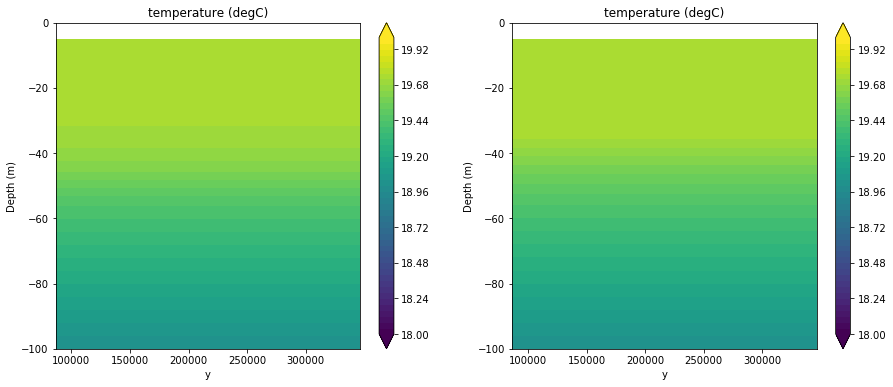

In [7]:
fig, axarr = plt.subplots(1,2)
fig.set_size_inches(15, 6)
temp.plot_yz(axis=axarr[0], xfrac=0.5, ptype='contourf', levels=levels)
axarr[0].set_ylim([-100, 0])
temp_ref.plot_yz(axis=axarr[1], xfrac=0.5, ptype='contourf', levels=levels)
axarr[1].set_ylim([-100, 0])


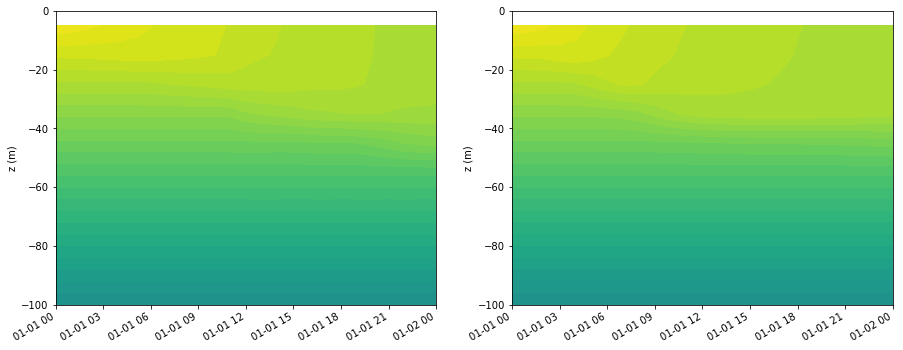

In [8]:
fig, axarr = plt.subplots(1,2)
fig.set_size_inches(15, 6)

temp_pfl = mpas_data.get_profile(varname='temperature', idx=0, name='temperature', units='degC',
                                 tidx_start=0, tidx_end=None)
temp_pfl.plot(axis=axarr[0], levels=levels, extend='both')
axarr[0].set_ylim([-100, 0])

temp_pfl_ref = mpas_data_ref.get_profile(varname='temperature', idx=0, name='temperature', units='degC',
                                         tidx_start=0, tidx_end=None)
temp_pfl_ref.plot(axis=axarr[1], levels=levels)
axarr[1].set_ylim([-100, 0])
plt.gcf().autofmt_xdate()


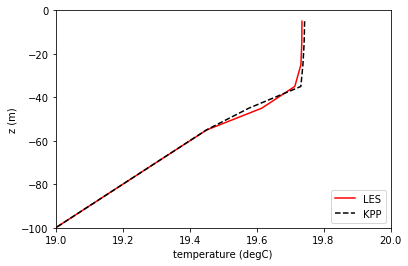

In [9]:
fig = plt.figure(figsize=[6,4])
pfl_snapshot = mpas_data.get_profile(varname='temperature', idx=0, name='temperature', units='degC',
                                     tidx_start=-1, tidx_end=None)
pfl_snapshot.plot_mean(color='r', label='LES')
pfl_snapshot_ref = mpas_data_ref.get_profile(varname='temperature', idx=0, name='temperature', units='degC',
                                             tidx_start=-1, tidx_end=None)
pfl_snapshot_ref.plot_mean(color='k', linestyle='--', label='KPP')
plt.ylim([-100, 0])
plt.xlim([19, 20])
plt.legend(loc='lower right')

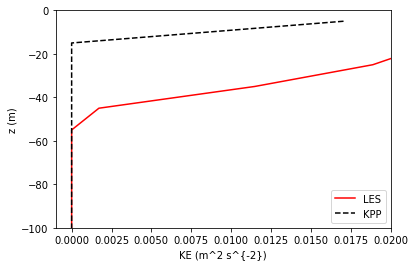

In [10]:
fig = plt.figure(figsize=[6,4])
pfl_snapshot = mpas_data.get_profile(varname='kineticEnergyCell', idx=0, name='KE', units='m^2 s^{-2}',
                                     tidx_start=-1, tidx_end=None)
pfl_snapshot.plot_mean(color='r', label='LES')
pfl_snapshot_ref = mpas_data_ref.get_profile(varname='kineticEnergyCell', idx=0, name='KE', units='m^2 s^{-2}',
                                             tidx_start=-1, tidx_end=None)
pfl_snapshot_ref.plot_mean(color='k', linestyle='--', label='KPP')
plt.ylim([-100, 0])
plt.xlim([-0.001,0.02])
plt.legend(loc='lower right')